In [ ]:
# -*- coding: utf-8 -*-
"""models.ipynb - Bug Free Version"""

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.xception import Xception
import matplotlib.pyplot as plt
import os


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Dataset Paths
train_dir = '/content/drive/MyDrive/Medicinal_Plants_Dataset/train'
test_dir = '/content/drive/MyDrive/Medicinal_Plants_Dataset/test'


In [ ]:
# Parameters
batch_size = 1     # as in your original code (note: very slow)
epochs = 8         # unified value (no mismatch now)
img_height = 180
img_width = 180


In [ ]:
# Data Generators
train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    batch_size=batch_size,
    shuffle=True,
    target_size=(img_height, img_width),
    class_mode='categorical'
)


Found 12081 images belonging to 201 classes.


In [ ]:
val_image_generator = ImageDataGenerator(rescale=1./255)
val_data_gen = val_image_generator.flow_from_directory(
    directory=test_dir,
    batch_size=batch_size,
    shuffle=True,
    target_size=(img_height, img_width),
    class_mode='categorical'
)



Found 6013 images belonging to 201 classes.


In [ ]:
# Load Pretrained Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False
base_model.summary()


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 89, 89,    │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 89, 89,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 89, 89,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 87, 87,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 87, 87,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 87, 87,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 87, 87,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 87, 87,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 87, 87,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 87, 87,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 87, 87,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 44, 44,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 44, 44,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 44, 44,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 44, 44,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 44, 44,    │          0 │ add[0][0]       

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
# Automatically detect number of classes
num_classes = train_data_gen.num_classes



In [ ]:
# Build Model
xception_net = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(num_classes, activation='softmax')   # auto-adjusts to dataset
])

xception_net.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 6, 6, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 201)            │       411,849 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,273,329 (81.15 MB)

 Trainable params: 411,849 (1.57 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
# Compile
xception_net.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])



In [11]:
# Train
history = xception_net.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen
)



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
12081/12081 ━━━━━━━━━━━━━━━━━━━━ 9265s 766ms/step - accuracy: 0.3530 - loss: 3.2589 - val_accuracy: 0.7524 - val_loss: 1.0406
Epoch 2/8
12081/12081 ━━━━━━━━━━━━━━━━━━━━ 161s 13ms/step - accuracy: 0.7436 - loss: 1.0678 - val_accuracy: 0.8473 - val_loss: 0.6344
Epoch 3/8
12081/12081 ━━━━━━━━━━━━━━━━━━━━ 160s 13ms/step - accuracy: 0.8382 - loss: 0.6739 - val_accuracy: 0.8881 - val_loss: 0.4548
Epoch 4/8
12081/12081 ━━━━━━━━━━━━━━━━━━━━ 201s 13ms/step - accuracy: 0.8836 - loss: 0.4757 - val_accuracy: 0.9177 - val_loss: 0.3271
Epoch 5/8
12081/12081 ━━━━━━━━━━━━━━━━━━━━ 162s 13ms/step - accuracy: 0.9169 - loss: 0.3376 - val_accuracy: 0.9528 - val_loss: 0.2199
Epoch 6/8
12081/12081 ━━━━━━━━━━━━━━━━━━━━ 232s 16ms/step - accuracy: 0.9434 - loss: 0.2437 - val_accuracy: 0.9576 - val_loss: 0.1955
Epoch 7/8
12081/12081 ━━━━━━━━━━━━━━━━━━━━ 162s 13ms/step - accuracy: 0.9579 - loss: 0.1831 - val_accuracy: 0.9790 - val_loss: 0.1176
Epoch 8/8
12081/12081 ━━━━━━━━━━━━━━━━━━━━ 235s 16ms/step - 

In [12]:
# Save Model
xception_net.save('Medicinal_plant8.h5')


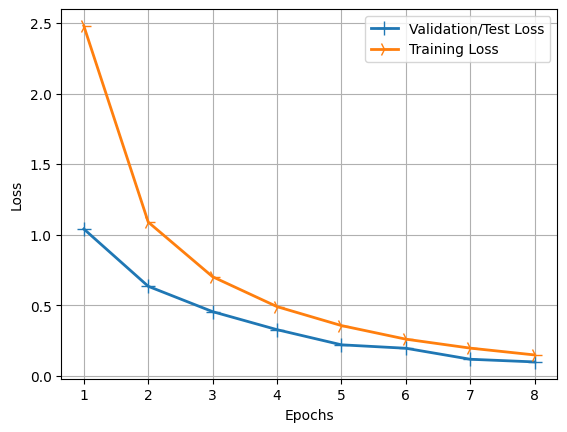

In [13]:
# Plot Loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs_range = range(1, len(loss_values) + 1)

plt.plot(epochs_range, val_loss_values, label='Validation/Test Loss', linewidth=2.0, marker='+', markersize=10.0)
plt.plot(epochs_range, loss_values, label='Training Loss', linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()



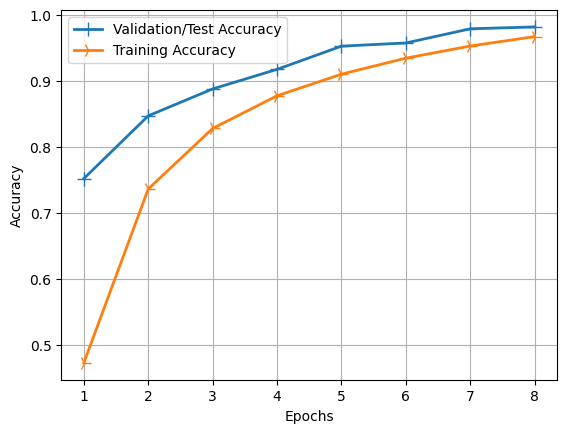

In [14]:
# Plot Accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs_range, val_acc_values, label='Validation/Test Accuracy', linewidth=2.0, marker='+', markersize=10.0)
plt.plot(epochs_range, acc_values, label='Training Accuracy', linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


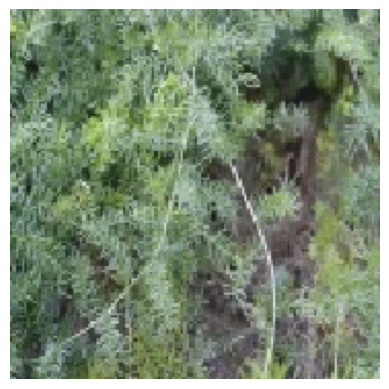

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted: Asparagus cochinchinensis prob: 0.9999960660934448


In [ ]:
# how to use the saved model to predict one image
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


model = load_model('Medicinal_plant8_Not.h5')

img_path = '/content/drive/MyDrive/Medicinal_Plants_Dataset/test/Asparagus cochinchinensis/32.JPG'
img = image.load_img(img_path, target_size=(180, 180))

# Display the image
plt.imshow(img)
plt.axis('off') # Hide axes
plt.show()

x = image.img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)   # make batch size 1
probs = model.predict(x)        # shape (1, num_classes)
pred_class_idx = np.argmax(probs, axis=1)[0]

# map index back to class name using the training generator's class_indices:
inv_map = {v:k for k,v in train_data_gen.class_indices.items()}
print("Predicted:", inv_map[pred_class_idx], "prob:", float(probs[0][pred_class_idx]))

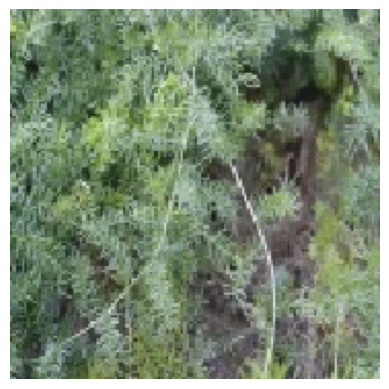

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted: Asparagus cochinchinensis prob: 0.9999960660934448


In [ ]:
# how to use the saved model to predict one image
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


model = load_model('Medicinal_plant8_Not.h5')

img_path = '/content/drive/MyDrive/Medicinal_Plants_Dataset/test/Asparagus cochinchinensis/32.JPG'
img = image.load_img(img_path, target_size=(180, 180))

# Display the image
plt.imshow(img)
plt.axis('off') # Hide axes
plt.show()

x = image.img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)   # make batch size 1
probs = model.predict(x)        # shape (1, num_classes)
pred_class_idx = np.argmax(probs, axis=1)[0]

# map index back to class name using the training generator's class_indices:
inv_map = {v:k for k,v in train_data_gen.class_indices.items()}
print("Predicted:", inv_map[pred_class_idx], "prob:", float(probs[0][pred_class_idx]))

In [16]:
import os

# List files in the test directory
for root, dirs, files in os.walk(test_dir):
    for name in files:
        print(os.path.join(root, name))
    # Limit the output to a reasonable number of files
    if len(files) > 100:
        break

/content/drive/MyDrive/Medicinal_Plants_Dataset/test/Zingiber officinale/13.JPG
/content/drive/MyDrive/Medicinal_Plants_Dataset/test/Zingiber officinale/23.JPG
/content/drive/MyDrive/Medicinal_Plants_Dataset/test/Zingiber officinale/33.JPG
/content/drive/MyDrive/Medicinal_Plants_Dataset/test/Zingiber officinale/35.JPG
/content/drive/MyDrive/Medicinal_Plants_Dataset/test/Zingiber officinale/34.JPG
/content/drive/MyDrive/Medicinal_Plants_Dataset/test/Zingiber officinale/36.JPG
/content/drive/MyDrive/Medicinal_Plants_Dataset/test/Zingiber officinale/37.JPG
/content/drive/MyDrive/Medicinal_Plants_Dataset/test/Zingiber officinale/38.JPG
/content/drive/MyDrive/Medicinal_Plants_Dataset/test/Zingiber officinale/42.JPG
/content/drive/MyDrive/Medicinal_Plants_Dataset/test/Zingiber officinale/39.JPG
/content/drive/MyDrive/Medicinal_Plants_Dataset/test/Zingiber officinale/41.JPG
/content/drive/MyDrive/Medicinal_Plants_Dataset/test/Zingiber officinale/40.JPG
/content/drive/MyDrive/Medicinal_Plants_

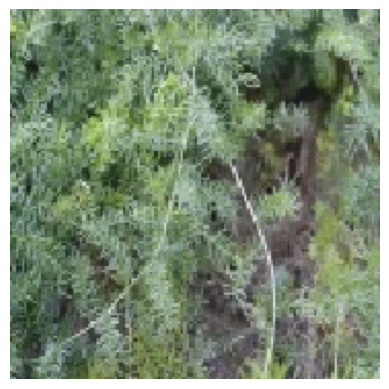

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted: Asparagus cochinchinensis prob: 0.9999960660934448


In [ ]:
# how to use the saved model to predict one image
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


model = load_model('Medicinal_plant8_Not.h5')

img_path = '/content/drive/MyDrive/Medicinal_Plants_Dataset/test/Asparagus cochinchinensis/32.JPG'
img = image.load_img(img_path, target_size=(180, 180))

# Display the image
plt.imshow(img)
plt.axis('off') # Hide axes
plt.show()

x = image.img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)   # make batch size 1
probs = model.predict(x)        # shape (1, num_classes)
pred_class_idx = np.argmax(probs, axis=1)[0]

# map index back to class name using the training generator's class_indices:
inv_map = {v:k for k,v in train_data_gen.class_indices.items()}
print("Predicted:", inv_map[pred_class_idx], "prob:", float(probs[0][pred_class_idx]))

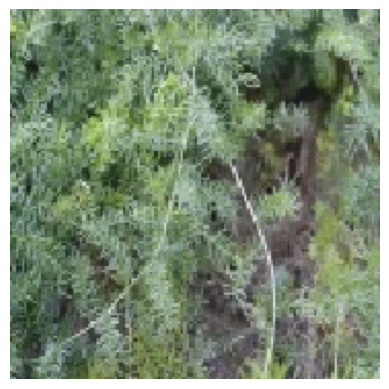

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted: Asparagus cochinchinensis prob: 0.9999960660934448


In [ ]:
# how to use the saved model to predict one image
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


model = load_model('Medicinal_plant8_Not.h5')

img_path = '/content/drive/MyDrive/Medicinal_Plants_Dataset/test/Asparagus cochinchinensis/32.JPG'
img = image.load_img(img_path, target_size=(180, 180))

# Display the image
plt.imshow(img)
plt.axis('off') # Hide axes
plt.show()

x = image.img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)   # make batch size 1
probs = model.predict(x)        # shape (1, num_classes)
pred_class_idx = np.argmax(probs, axis=1)[0]

# map index back to class name using the training generator's class_indices:
inv_map = {v:k for k,v in train_data_gen.class_indices.items()}
print("Predicted:", inv_map[pred_class_idx], "prob:", float(probs[0][pred_class_idx]))

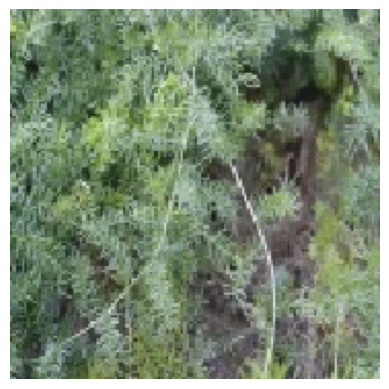

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted: Asparagus cochinchinensis prob: 0.9999960660934448


In [ ]:
# how to use the saved model to predict one image
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


model = load_model('Medicinal_plant8_Not.h5')

img_path = '/content/drive/MyDrive/Medicinal_Plants_Dataset/test/Asparagus cochinchinensis/32.JPG'
img = image.load_img(img_path, target_size=(180, 180))

# Display the image
plt.imshow(img)
plt.axis('off') # Hide axes
plt.show()

x = image.img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)   # make batch size 1
probs = model.predict(x)        # shape (1, num_classes)
pred_class_idx = np.argmax(probs, axis=1)[0]

# map index back to class name using the training generator's class_indices:
inv_map = {v:k for k,v in train_data_gen.class_indices.items()}
print("Predicted:", inv_map[pred_class_idx], "prob:", float(probs[0][pred_class_idx]))